In [1]:
# importing necessary libraries

import numpy as np # It is used for Mathematical Computations on array or matrix data frame
import pandas as pd # It is used to load the dataset and perform data cleaning operations on it

import matplotlib.pyplot as plt # It is used for data visualisation like making histogram, bar-chart, and pie-chart
import seaborn as sns # It is used for statistical data visualisation
sns.set_style('darkgrid') # It represents the theme of figure

import plotly as py # It is used for data visualisation
import plotly.graph_objs as go # It is used for data visualisation

import warnings # It is used to deal with exceptions
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score 
# It is an evaluation matrix for machine learning models

In [2]:
data= pd.read_csv('heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.shape

(319795, 18)

In [4]:
data.dtypes # Checking the data types of columns

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [5]:
data.columns # Printing the column names

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
data.info() # Checking the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
data.isna().sum() # Checking for the null values in the dataset

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
#showing the description of the dataset
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Univariate analysis

In [9]:
data["HeartDisease"].describe()

count     319795
unique         2
top           No
freq      292422
Name: HeartDisease, dtype: object

In [10]:
#checking the distribution of target columns
data["HeartDisease"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [11]:
# Balancing the Dataset
data_heart = data[data.HeartDisease=='No']
data_heart= data_heart.head(40000) # Taking only 40000 rows from 'No' class

data_heart_no = data[data.HeartDisease=='Yes']
data_heart_no=data_heart_no.head(30000) # Taking only 30000 rows from 'Yes' class


df = data_heart_no.append(data_heart, ignore_index=True) # Appending both the classes


In [12]:
df.shape # Checking the shape again

(67373, 18)

Text(0.5, 1.0, 'Distribution of the target column')

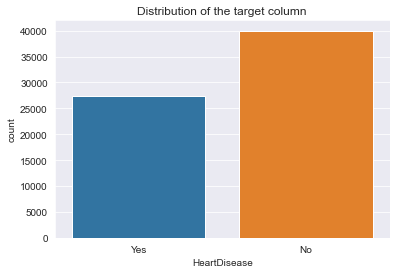

In [13]:
sns.countplot(df["HeartDisease"])
plt.title("Distribution of the target column")

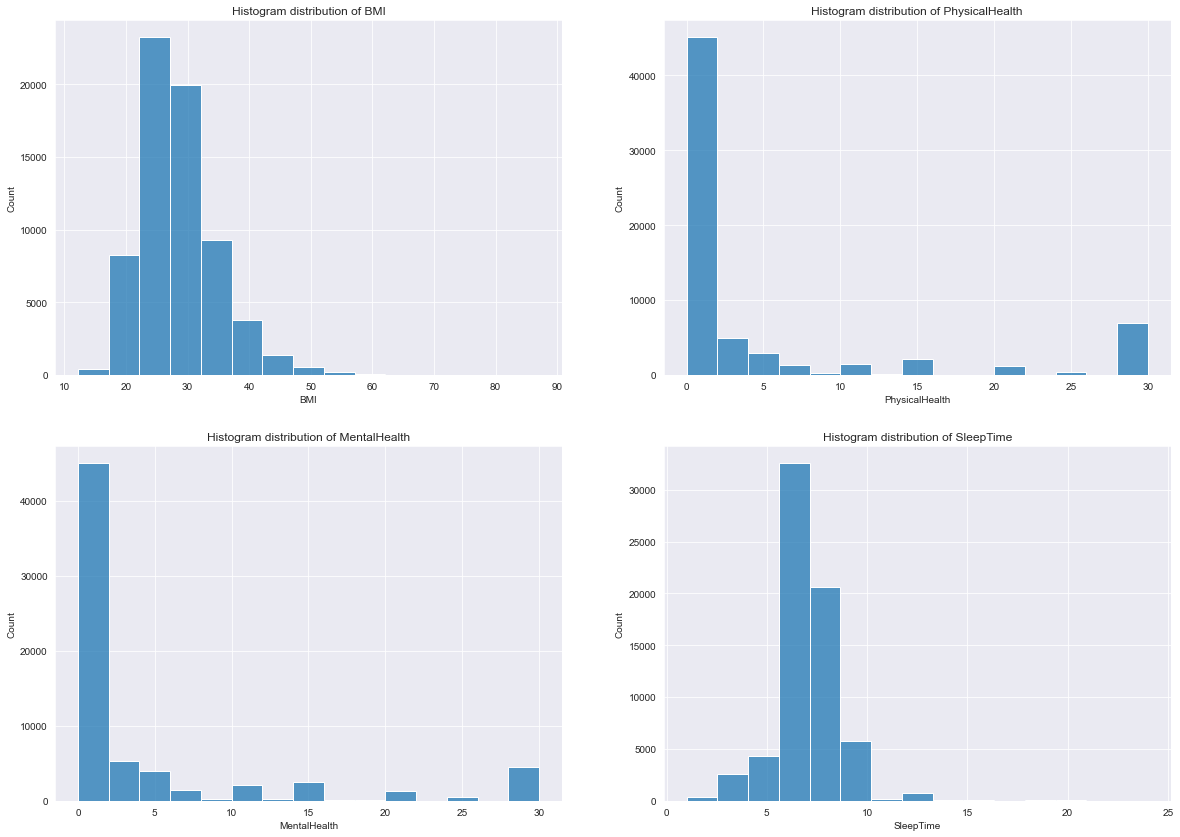

In [14]:
# Plotting the numerical columns in the dataset with the help of histogram
columnss=['BMI','PhysicalHealth','MentalHealth','SleepTime']

plt.figure(figsize=(20,10))
for i,j in zip(range(1, 18),columnss):
    plt.subplot(3, 2, i)
    plt.subplots_adjust(right=0.9,top=1.8)
    sns.histplot(df[j], bins=15)
    plt.title('Histogram distribution of {}'.format(j))

<AxesSubplot:xlabel='AgeCategory', ylabel='Count'>

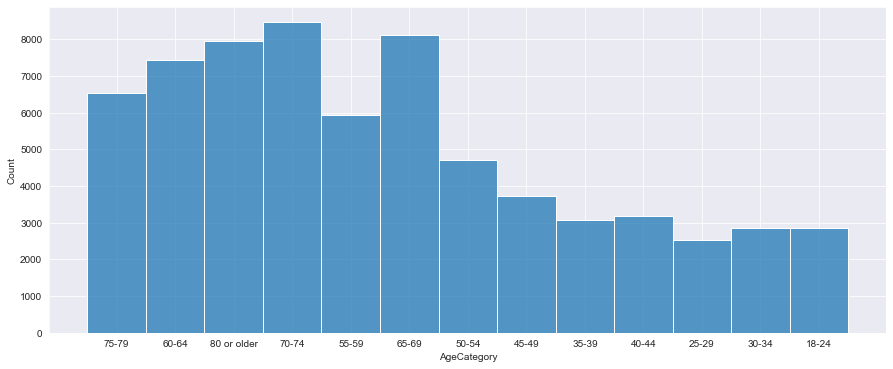

In [15]:
plt.figure(figsize=(15,6))

sns.histplot(df['AgeCategory'], bins=15)

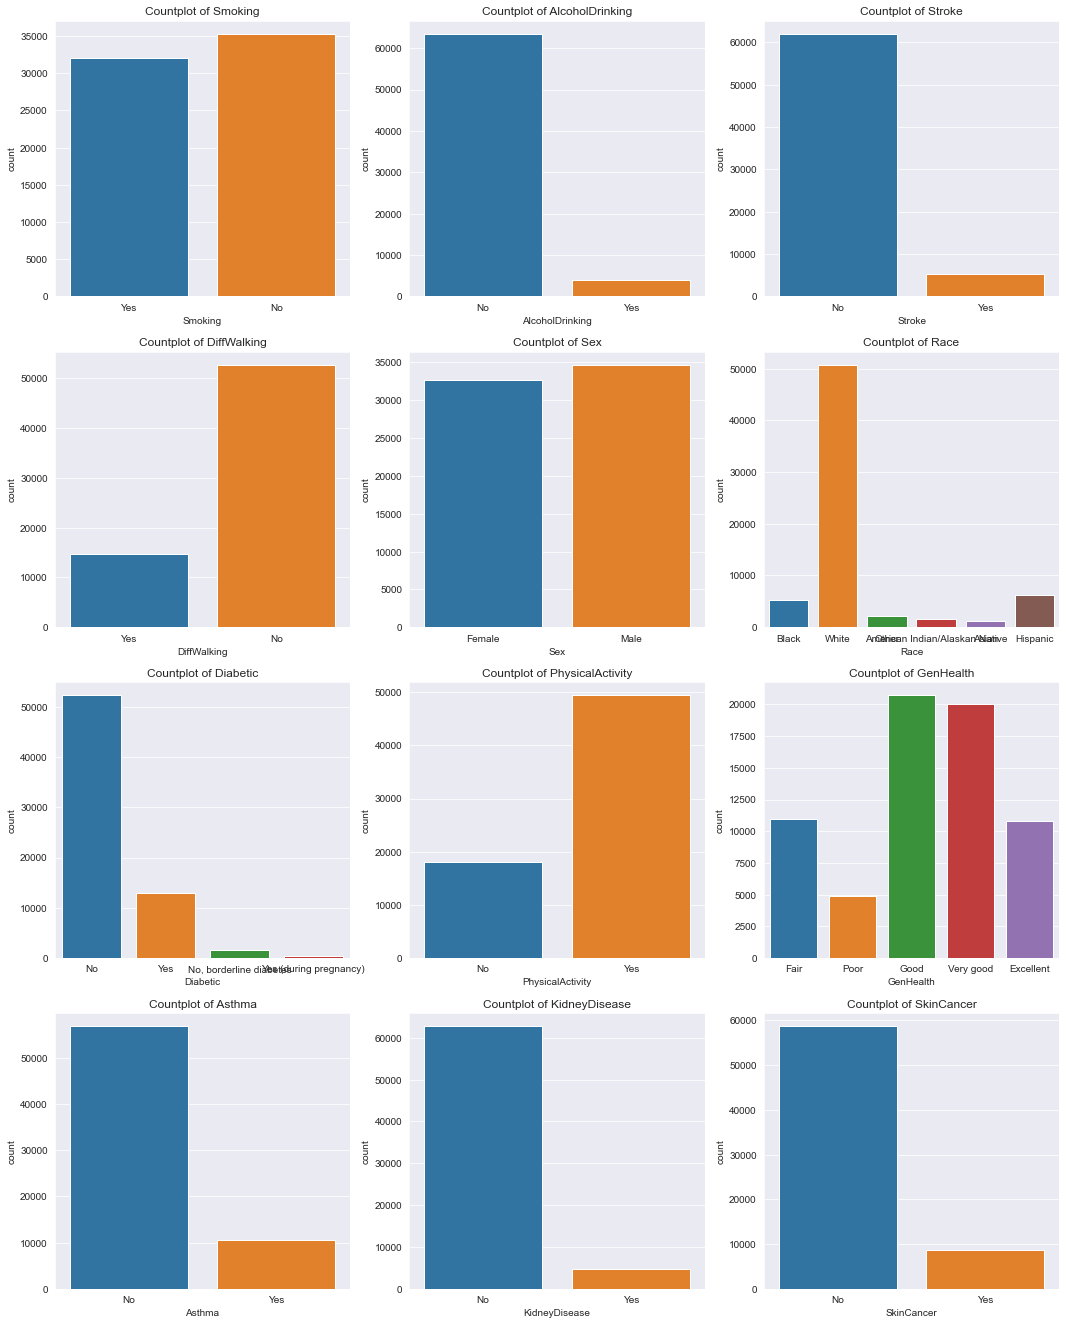

In [16]:
# Plotting the categorical columns with the help of barplot
cat_columns= ["Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","Race","Diabetic","PhysicalActivity",
             "GenHealth","Asthma","KidneyDisease","SkinCancer"]

plt.figure(figsize=(18,16))
for i,j in zip(range(1, 18),cat_columns):
    plt.subplot(6, 3, i)
    plt.subplots_adjust(right=0.9,top=1.8)
    sns.countplot(df[j])
    plt.title('Countplot of {}'.format(j))

# Bivariate analysis

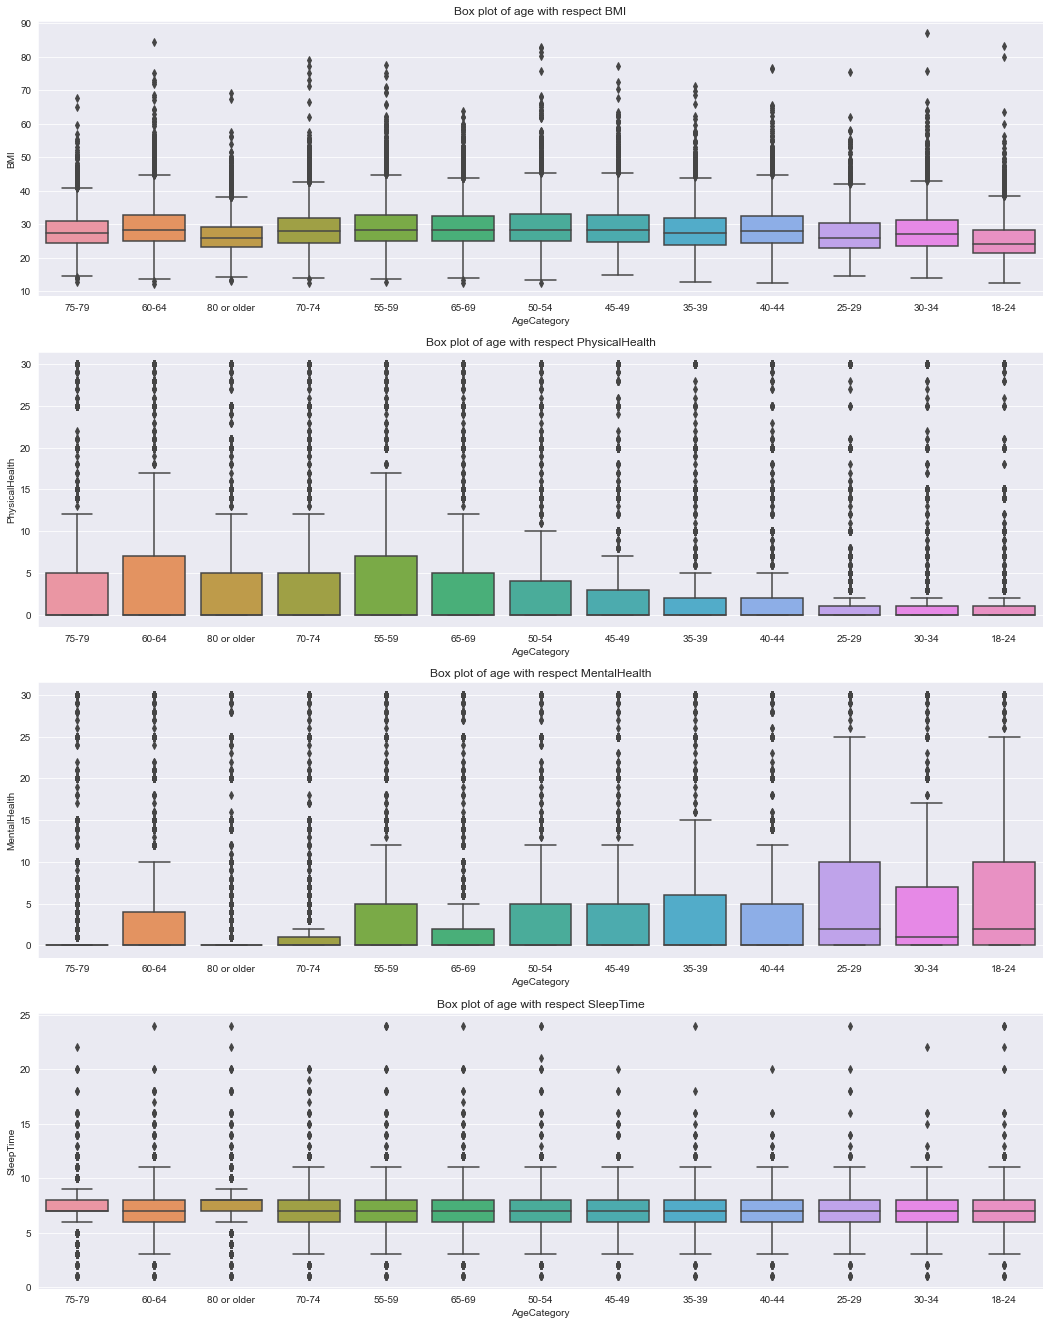

In [17]:
plt.figure(figsize=(18,16))
columnss=['BMI','PhysicalHealth','MentalHealth','SleepTime']


for i,j in zip(range(1, 18),columnss):
    plt.subplot(6, 1, i)
    plt.subplots_adjust(right=0.9,top=1.8)
    sns.boxplot(x='AgeCategory',y=j,data=df)
    plt.title('Box plot of age with respect {}'.format(j))

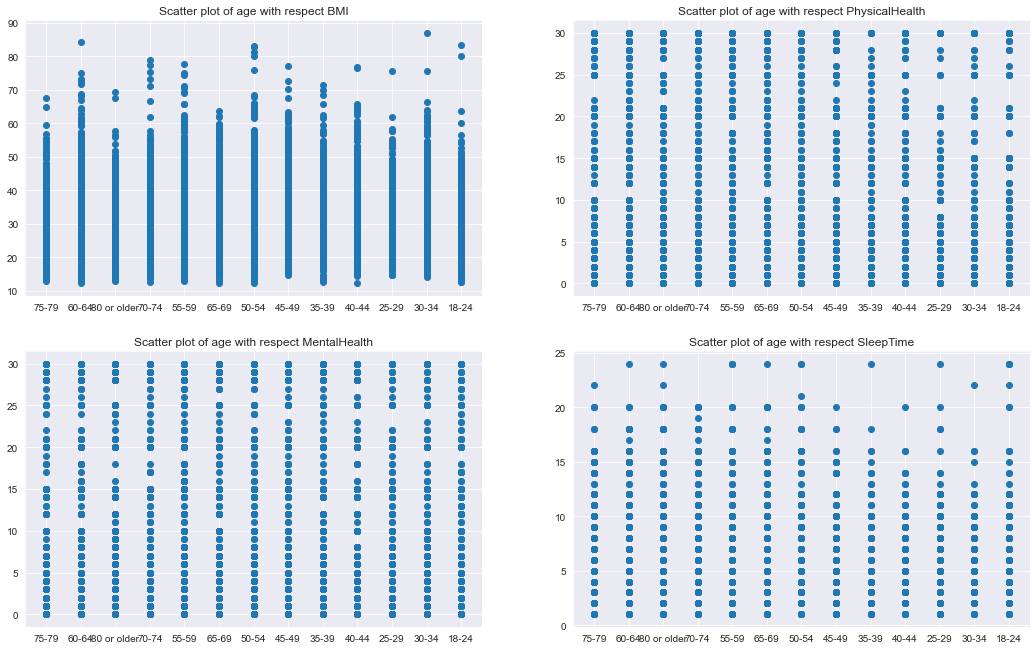

In [18]:
plt.figure(figsize=(18,16))

for i,j in zip(range(1, 18),columnss):
    plt.subplot(6, 2, i)
    plt.subplots_adjust(right=0.9,top=1.8)
    plt.scatter(df['AgeCategory'], df[j])
    plt.title('Scatter plot of age with respect {}'.format(j))

# Multivariate analysis

In [19]:
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)


,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.00,0.13,0.07,-0.04
PhysicalHealth,0.13,1.00,0.31,-0.06
MentalHealth,0.07,0.31,1.00,-0.12
SleepTime,-0.04,-0.06,-0.12,1.00


In [20]:
# Encoding the categorical columns into integer type
for i in df.columns:
    if(df[i].dtype == 'object'):
        df[i]= df[i].astype('category')
        df[i] = df[i].cat.codes

In [21]:
# Specifying the target variable and input features
target=df['HeartDisease']
input_features=df.drop(labels='HeartDisease', axis=1)

In [22]:
# Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split as SPT
X_train, X_test, y_train, y_test = SPT(input_features, target, test_size = 0.25, random_state = 42,stratify=target)

In [23]:
# Feature Scaling - Normalizing the values in the range of 0 to 1
from sklearn.preprocessing import StandardScaler as SS
sc = SS()

columnss=['BMI','PhysicalHealth','MentalHealth','SleepTime']


X_train[columnss] = sc.fit_transform(X_train[columnss])
X_test[columnss] = sc.transform(X_test[columnss])

# XgBoost classifier

In [24]:
# https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
clf.feature_importances_

array([0.01247607, 0.03168848, 0.02289211, 0.15277846, 0.02277793,
       0.0129284 , 0.18974575, 0.07460275, 0.16400976, 0.02311884,
       0.08165824, 0.01189987, 0.10435995, 0.01345091, 0.01374689,
       0.0537693 , 0.01409627], dtype=float32)

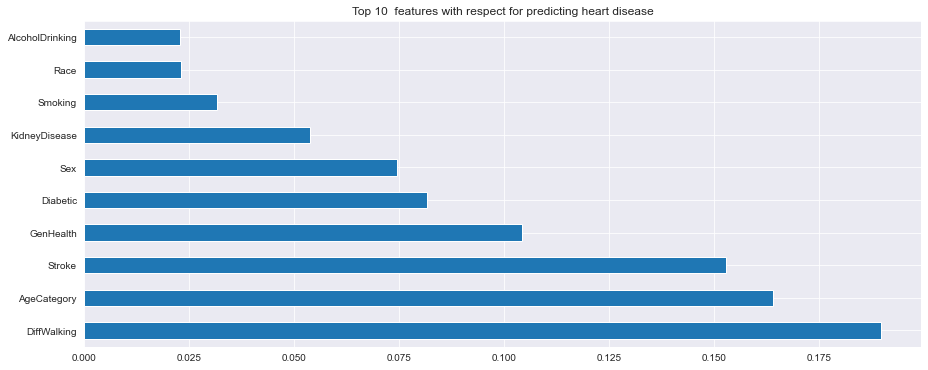

In [26]:
features=pd.Series(clf.feature_importances_,index=X_train.columns)
plt.figure(figsize=(15,6))

features.nlargest(10).plot(kind='barh')
plt.title("Top 10  features with respect for predicting heart disease")
plt.show()

In [27]:
# Making prediction on test dataset
pred= clf.predict(X_test)

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     10000
           1       0.71      0.71      0.71      6844

    accuracy                           0.77     16844
   macro avg       0.76      0.76      0.76     16844
weighted avg       0.77      0.77      0.77     16844



In [29]:
confusion_matrix(y_test, pred)

array([[8065, 1935],
       [2007, 4837]], dtype=int64)

In [30]:
xgb_classsifier = accuracy_score(y_test, pred)

## Tunning the Xgboost classifier

In [31]:
parameters = {
    "max_depth": [3, 4, 5, 7],
    "scale_pos_weight": [ 75, 99, 100, 200],

}

from sklearn.model_selection import GridSearchCV
best = GridSearchCV(clf, parameters, n_jobs=-1, cv=3, scoring="roc_auc")
best.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 7],
                         'scale_pos_weight': [75, 99, 100, 200]},
             scoring='roc_auc')

In [32]:
best.best_params_

{'max_depth': 3, 'scale_pos_weight': 99}

In [33]:
clf_new= xgb.XGBClassifier(**best.best_params_)
clf_new.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [34]:
pred= clf_new.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.02      0.03     10000
           1       0.41      1.00      0.58      6844

    accuracy                           0.42     16844
   macro avg       0.69      0.51      0.31     16844
weighted avg       0.75      0.42      0.25     16844



In [35]:
confusion_matrix(y_test, pred)

array([[ 160, 9840],
       [   4, 6840]], dtype=int64)

In [36]:
xgb_classsifier_tuned = accuracy_score(y_test, pred)

# Balanced random forest classifier

In [37]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

BalancedRandomForestClassifier()

In [38]:
pred= model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77     10000
           1       0.66      0.78      0.71      6844

    accuracy                           0.75     16844
   macro avg       0.74      0.75      0.74     16844
weighted avg       0.76      0.75      0.75     16844



In [39]:
confusion_matrix(y_test, pred)

array([[7225, 2775],
       [1518, 5326]], dtype=int64)

In [40]:
BRF = accuracy_score(y_test, pred)

# Voting classifier

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [42]:
clf2 = RandomForestClassifier(class_weight='balanced')
clf3 = LogisticRegression(class_weight='balanced')

model = []
model.append(('RF', clf2))
model.append(('LR', clf3))

In [43]:
# Voting Classifier with hard voting
clf = VotingClassifier(estimators = model, voting ='hard')
clf.fit(X_train, y_train)


VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(class_weight='balanced')),
                             ('LR',
                              LogisticRegression(class_weight='balanced'))])

In [44]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77     10000
           1       0.66      0.78      0.71      6844

    accuracy                           0.75     16844
   macro avg       0.74      0.75      0.74     16844
weighted avg       0.76      0.75      0.75     16844



In [45]:
confusion_matrix(y_test, pred)

array([[7225, 2775],
       [1518, 5326]], dtype=int64)

In [46]:
hard_clf = accuracy_score(y_test, pred)

In [47]:
# Soft Voting Classifier
model2 = VotingClassifier(estimators = model, voting ='soft')
model2.fit(X_train, y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(class_weight='balanced')),
                             ('LR',
                              LogisticRegression(class_weight='balanced'))],
                 voting='soft')

In [48]:
y_pred = model2.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77     10000
           1       0.66      0.78      0.71      6844

    accuracy                           0.75     16844
   macro avg       0.74      0.75      0.74     16844
weighted avg       0.76      0.75      0.75     16844



In [49]:
confusion_matrix(y_test, pred)

array([[7225, 2775],
       [1518, 5326]], dtype=int64)

In [50]:
soft_clf = accuracy_score(y_test, pred)

# MLP classiifer

In [51]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1,hidden_layer_sizes=(150,100,50), max_iter=300).fit(X_train, y_train)

In [52]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77     10000
           1       0.66      0.78      0.71      6844

    accuracy                           0.75     16844
   macro avg       0.74      0.75      0.74     16844
weighted avg       0.76      0.75      0.75     16844



In [53]:
confusion_matrix(y_test, pred)

array([[7225, 2775],
       [1518, 5326]], dtype=int64)

In [54]:
mlp = accuracy_score(y_test, pred)

In [55]:
# TUNING MLP Classifier Model
# https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa

params = {
    'hidden_layer_sizes': [(50,150,50)]
}


from sklearn.model_selection import GridSearchCV
model = GridSearchCV(clf, params, n_jobs=-1, cv=3, scoring="roc_auc")
model.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                                     max_iter=300, random_state=1),
             n_jobs=-1, param_grid={'hidden_layer_sizes': [(50, 150, 50)]},
             scoring='roc_auc')

In [56]:
model.best_params_

{'hidden_layer_sizes': (50, 150, 50)}

In [57]:
clf = MLPClassifier(**model.best_params_).fit(X_train, y_train)
pred= clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     10000
           1       0.66      0.67      0.67      6844

    accuracy                           0.73     16844
   macro avg       0.72      0.72      0.72     16844
weighted avg       0.73      0.73      0.73     16844



In [58]:
confusion_matrix(y_test, pred)

array([[7660, 2340],
       [2261, 4583]], dtype=int64)

In [59]:
mlp_tuned = accuracy_score(y_test, pred)

# Bagging classifier

In [60]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier()
clf.fit(X_train,y_train)

BaggingClassifier()

In [61]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     10000
           1       0.66      0.67      0.67      6844

    accuracy                           0.73     16844
   macro avg       0.72      0.72      0.72     16844
weighted avg       0.73      0.73      0.73     16844



In [62]:
confusion_matrix(y_test, pred)

array([[7660, 2340],
       [2261, 4583]], dtype=int64)

In [63]:
bagging = accuracy_score(y_test, pred)

# Plotting result

In [69]:
accuracy = [xgb_classsifier,xgb_classsifier_tuned,BRF,hard_clf,soft_clf,mlp,mlp_tuned,bagging]
model = ["XgBoost classifer","XgBoost Classifier Tuned","Balanced random forest","Voting classifier (Hard clf)","Voting classifier (Soft clf)","MLP classifer","MLP Classifier Tuned","Bagging classifier"]    

for i in range(len(model)):
    print("The accuracy of  "+model[i]+" is: "+str(accuracy[i]*100)+" %")

The accuracy of  XgBoost classifer is: 76.59700783661837 %
The accuracy of  XgBoost Classifier Tuned is: 41.55782474471622 %
The accuracy of  Balanced random forest is: 74.51317976727618 %
The accuracy of  Voting classifier (Hard clf) is: 74.51317976727618 %
The accuracy of  Voting classifier (Soft clf) is: 74.51317976727618 %
The accuracy of  MLP classifer is: 74.51317976727618 %
The accuracy of  MLP Classifier Tuned is: 72.68463547850867 %
The accuracy of  Bagging classifier is: 72.68463547850867 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

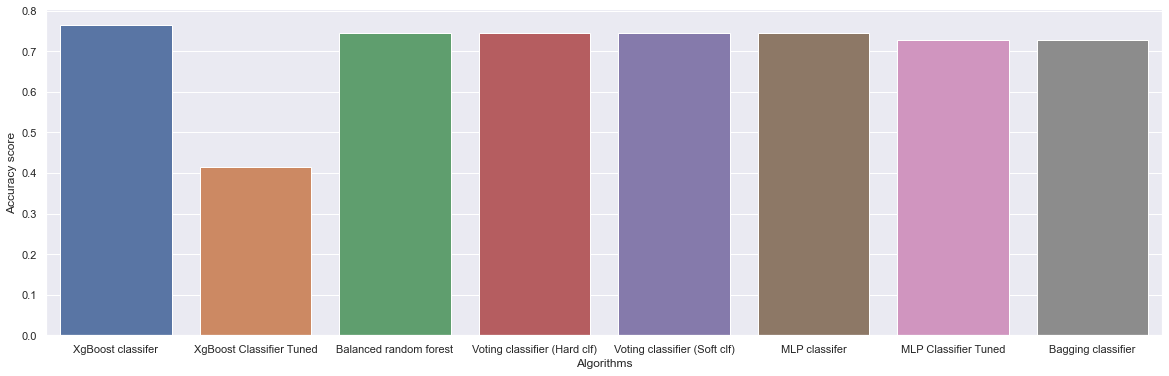

In [71]:
sns.set(rc={'figure.figsize':(20,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(model,accuracy)